In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt

import sys
sys.path.append("..")  

#for development purposes
%reload_ext autoreload
%autoreload 2

import enlopy as el

## Generate energy loads using monthly and daily profiles for a working and a non-working day

Create random monthly and daily loads

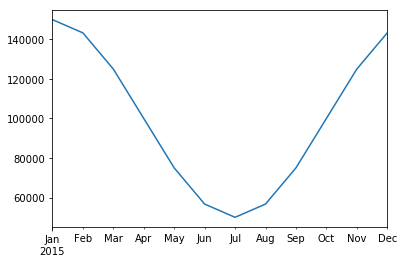

In [2]:
ML  = (np.cos(2 * np.pi/12 * np.linspace(0,11,12)) * 50 + 100 ) * 1000  # monthly load
ML = el.make_timeseries(ML) #convenience wrapper around pd.DataFrame with pd.DateTimeindex
ML.plot()

Create normalized random daily load for a working and non-working day

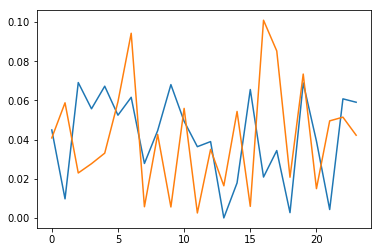

In [3]:
DWL =  np.random.rand(24) * 10 #daily load working
DWL = DWL / DWL.sum() # normalized

DNWL = np.random.rand(24) * 5 #daily load non working
DNWL = DNWL / DNWL.sum() #normalized daily load non working

plt.plot(DNWL)
plt.plot(DWL)

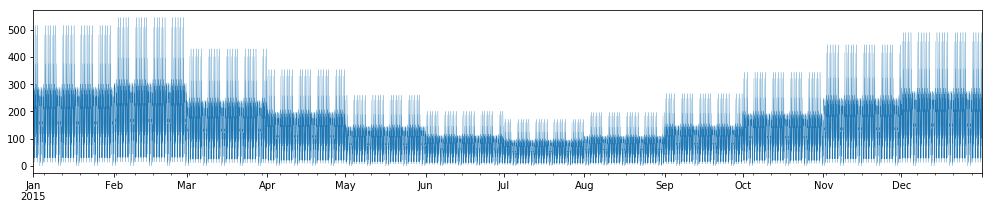

In [4]:
#Define the weighting factor of energy during working and non-working days.
Weight = .55 # i.e energy will be split 55% in working day 45% non working day

Load1 =  el.gen_load_from_daily_monthly(ML, DWL, DNWL, Weight)
Load1.name='House1'
Load1.plot(figsize=(17,3), linewidth =.2, grid = False);

Check if the total sum of energy is the same

In [5]:
print 'error = {:.2f}'.format(Load1.sum() - ML.sum())

error = -0.00


## Reshape (days - hours) and plot heatmap 

In [6]:
el.reshape_timeseries(Load1, x='month', y='hour')

month,1,2,3,4,5,6,7,8,9,10,11,12
hour,,,,,,,,,,,,
0,6282.207733,5999.206763,5235.173111,4179.398015,3150.139527,2369.665588,2088.119610,2381.452132,3134.548511,4188.138489,5239.671323,5984.603847
1,6974.153381,6692.171904,5811.794484,4754.624584,3378.335219,2695.811747,2396.319870,2553.964211,3565.968438,4649.435587,5757.659850,6867.913624
2,5182.812468,4923.612424,4319.010390,3356.182094,2693.776796,1902.912617,1660.197078,2036.449636,2517.136570,3455.208312,4369.973402,4758.167002
3,5211.536120,4961.954459,4342.946767,3414.239059,2667.916750,1935.830179,1696.256185,2016.899879,2560.679294,3474.357413,4373.886173,4861.513317
4,6249.028391,5949.417053,5207.523659,4092.704890,3200.304216,2320.511687,2033.104650,2419.375788,3069.528667,4166.018927,5245.254113,5826.929575
5,8640.353075,8258.626329,7200.294229,5774.996920,4304.916469,3274.349900,2890.165859,3254.443943,4331.247690,5760.235383,7192.697328,8283.288774
6,12908.375359,12351.561526,10756.979466,8675.720966,6381.681585,4919.023590,4350.534261,4824.443199,6506.790724,8605.583572,10720.883845,12468.741712
7,1695.038602,1606.062396,1412.532168,1082.631466,896.514183,613.838290,532.751622,677.749539,811.973600,1130.025735,1436.923231,1526.879683
8,6468.020382,6177.986006,5390.016985,4307.786860,3238.379664,2442.460433,2153.129663,2448.160182,3230.840145,4312.013588,5392.192234,6170.924313


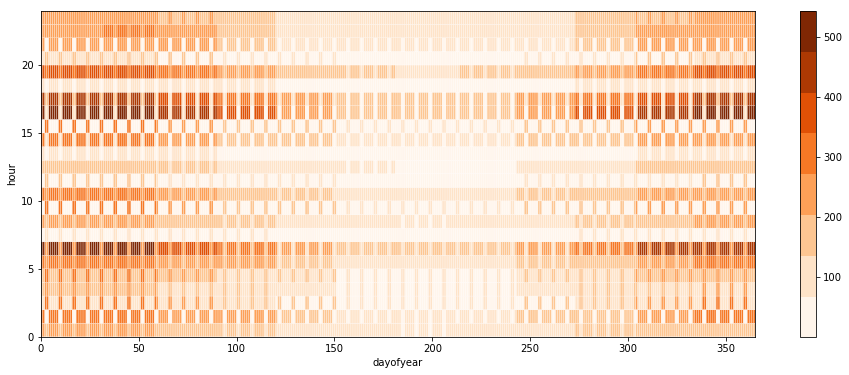

In [7]:
el.plot_heatmap(Load1)

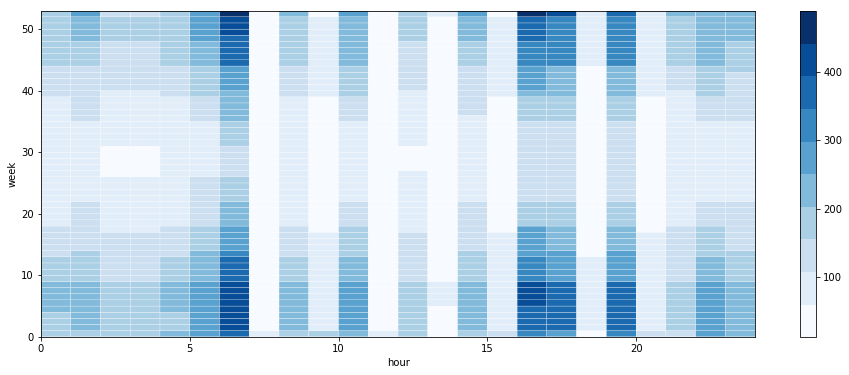

In [8]:
el.plot_heatmap(Load1, x='hour', y='week',bins=10, aggfunc='mean', palette='Blues')

### Plot percentiles

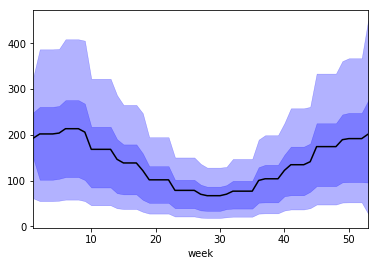

In [9]:
el.plot_percentiles(Load1, x='week', zz='hour')

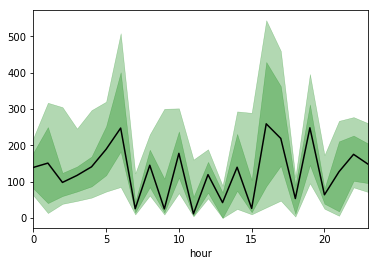

In [10]:
el.plot_percentiles(Load1, x='hour', zz='dayofyear', perc_list=[[1,99], [25,75], 50],color='green')

### 3d plots

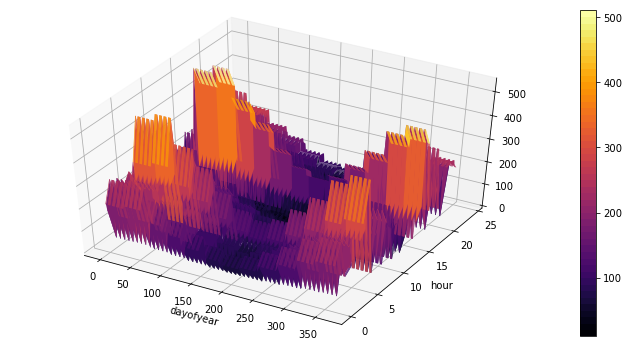

In [11]:
el.plot_3d(Load1, bins=50, palette='inferno')

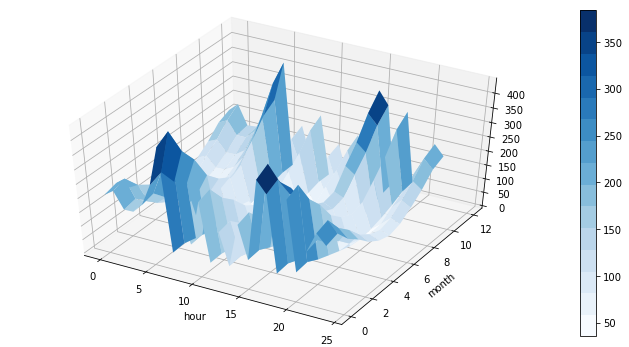

In [12]:
el.plot_3d(Load1, x='hour', y='month', aggfunc='mean', palette='Blues')

### Boxplot

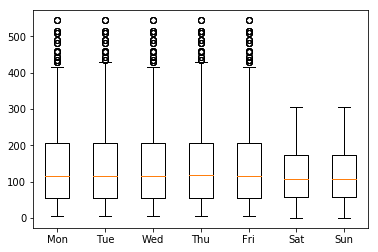

In [13]:
el.plot_boxplot(Load1, by='day')

### Rugplot

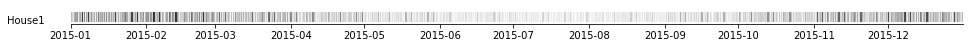

In [14]:
el.plot_rug(Load1, on_off=False, cmap='Greys')

In [15]:
df_many = pd.concat([Load1, Load1['Jun 2015':'Nov 2015']], axis=1)

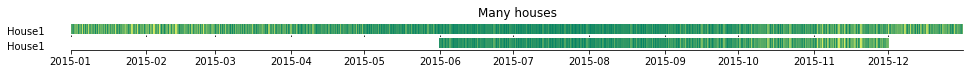

In [16]:
#It also accepts a dataframe of timeseries
el.plot_rug(df_many, cmap='summer', fig_title='Many houses')

## Archetypes

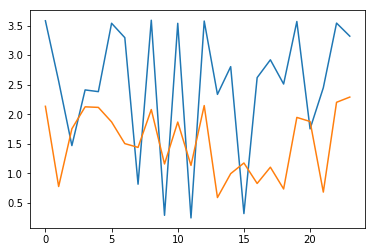

In [17]:
plt.plot(el.get_load_archetypes(Load1,2));

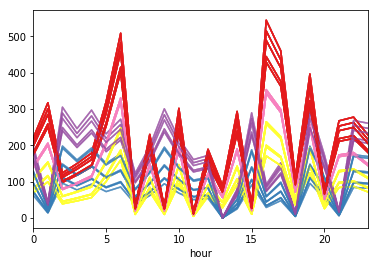

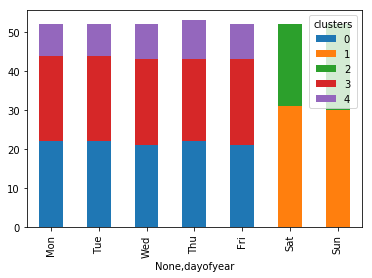

In [18]:
el.get_load_archetypes(Load1, 5, plot_diagnostics=True);

## Get and plot Load Duration Curve of load

In [19]:
el.get_LDC(Load1)

(array([  1.14155251e-04,   2.28310502e-04,   3.42465753e-04, ...,
          9.99771689e-01,   9.99885845e-01,   1.00000000e+00]),
 array([  5.44600604e+02,   5.44600604e+02,   5.44600604e+02, ...,
          9.34066335e-02,   9.34066335e-02,   9.34066335e-02]))

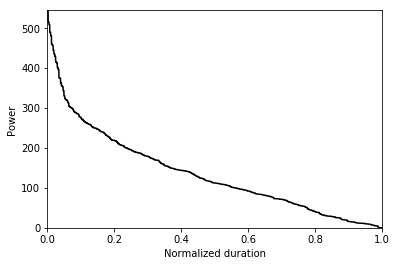

In [20]:
el.plot_LDC(Load1)

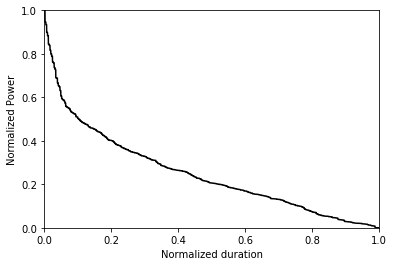

In [21]:
el.plot_LDC(Load1, y_norm=True)

# Add noise to a load

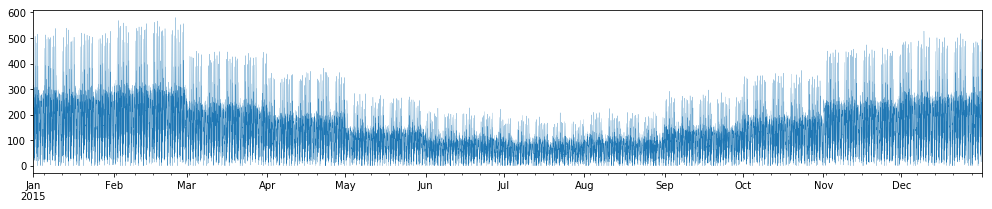

In [22]:
Load1_noise = el.add_noise(Load1, 3, 10) # Gauss Markov noise

fig = plt.figure(figsize=(14,3))

#plt.plot(Load1_noise,linewidth =.3)
Load1_noise.plot(figsize=(17,3), linewidth =.2, grid = False)
Load1_noise.name='Noisy'

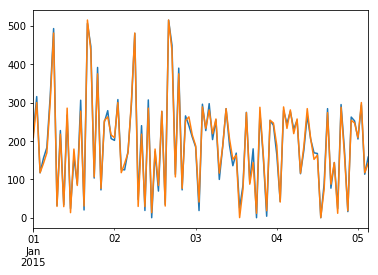

In [23]:
Load1_noise[0:100].plot()
Load1[0:100].plot()

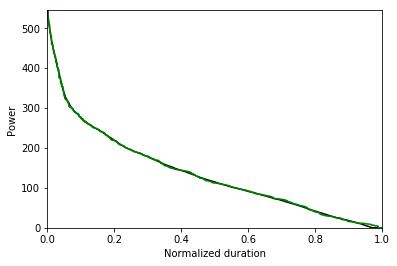

In [24]:
el.plot_LDC(Load1_noise)
el.plot_LDC(Load1,color='g')

## Gather statistics

In [25]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.251535
Load ratio (max/min),5830.43
Max,544.601
Min (2%),0.0934066
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-312.377050838, 284.022654355)"
Sum,1.2e+06
Total Zero load duration,0


We can also check the statistics per defined time period. Example for month ('m'):

In [26]:
el.get_load_stats(Load1, per='m') 

,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12
Average,201.613,213.246,168.011,138.889,100.806,78.7482,67.2043,76.208,104.167,134.409,173.611,192.609
Biggest duration of consecitive zero load,0,0,0,0,0,0,0,0,0,0,0,0
Load Factor (peakiness),0.391218,0.391564,0.391218,0.392994,0.388795,0.392994,0.39364,0.388795,0.392994,0.391218,0.390491,0.39364
Load ratio (max/min),1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76,1827.76
Max,515.347,544.601,429.456,353.412,259.279,200.38,170.725,196.01,265.059,343.565,444.597,489.303
Min (2%),0.281955,0.29796,0.234963,0.193358,0.141856,0.109631,0.0934066,0.107241,0.145018,0.18797,0.243246,0.267706
Periodicity,"(124.0, 23.0)","(168.0, 112.0)","(124.0, 23.0)","(180.0, 120.0)","(124.0, 23.0)","(180.0, 120.0)","(124.0, 23.0)","(124.0, 23.0)","(180.0, 120.0)","(124.0, 23.0)","(120.0, 22.0)","(124.0, 23.0)"
Ramps (98%),"(-451.990460053, 484.931204763)","(-477.647732274, 512.458360817)","(-376.658716711, 404.109337302)","(-309.963733752, 332.553671207)","(-227.403299996, 243.976291493)","(-175.745499911, 188.553707513)","(-149.736326766, 160.649004245)","(-171.913043527, 184.441944421)","(-232.472800314, 249.415253405)","(-301.326973369, 323.287469842)","(-389.938350954, 418.356781887)","(-429.148116382, 460.424127257)"
Sum,150000,143301,125000,100000,75000,56698.7,50000,56698.7,75000,100000,125000,143301
Total Zero load duration,0,0,0,0,0,0,0,0,0,0,0,0


## Load Shifting

In [27]:
Load1_DR = el.gen_demand_response(Load1, 0.15, 0.30)

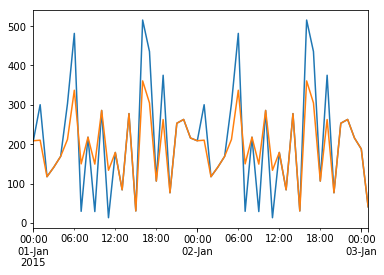

In [28]:
Load1[0:50].plot()
Load1_DR[0:50].plot()

In [29]:
el.get_load_stats(Load1)

,2015
Average,136.986
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.251535
Load ratio (max/min),5830.43
Max,544.601
Min (2%),0.0934066
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-312.377050838, 284.022654355)"
Sum,1.2e+06
Total Zero load duration,0


In [30]:
el.get_load_stats(Load1_DR) #it is less peaky as expected after the peak shaving

,2015
Average,133.426
Biggest duration of consecitive zero load,0
Load Factor (peakiness),0.349998
Load ratio (max/min),37.8338
Max,381.22
Min (2%),10.0762
Periodicity,"(2190.0, 162.0)"
Ramps (98%),"(-197.128330615, 220.218090127)"
Sum,1.16881e+06
Total Zero load duration,0


## Sample new loads from load duration curve

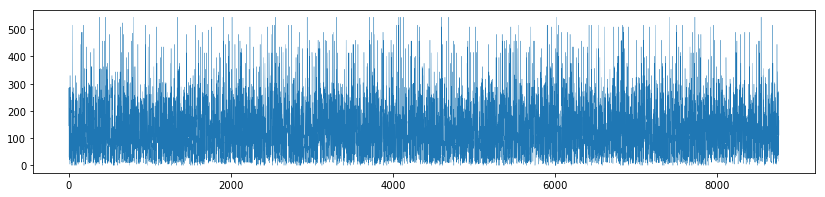

In [31]:
Load1a = el.gen_load_from_LDC(el.get_LDC(Load1))
fig = plt.figure(figsize=(14,3))
plt.plot(Load1a, linewidth =.3)

Check whether they have the same distribution

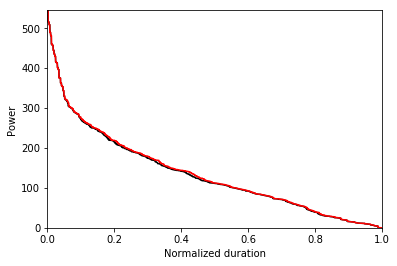

In [32]:
el.plot_LDC(Load1a)
el.plot_LDC(Load1,color='red')